In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(11239, 13)

In [11]:
df['Amount']=df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df.rename(columns={'Marital_Status':'Shaadi'},inplace=True)

In [15]:
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis 

### Gender

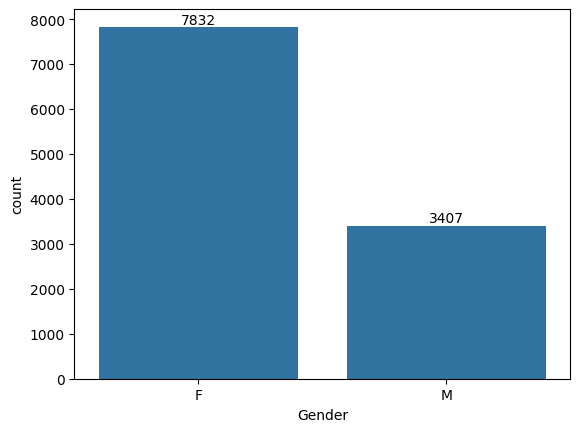

In [16]:
pl=sns.countplot(x='Gender',data=df)
for bars in pl.containers:
    pl.bar_label(bars)

In [17]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

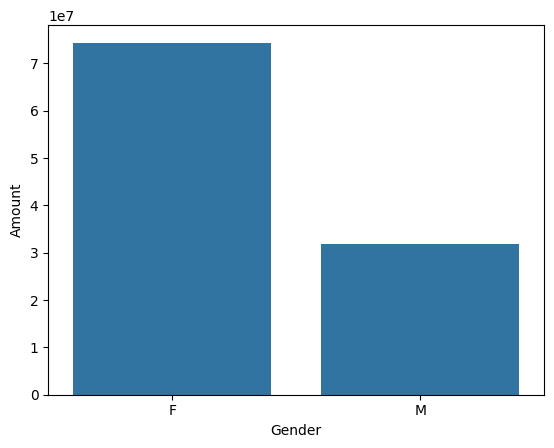

In [18]:
df2=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=df2)

<Axes: xlabel='Age Group', ylabel='count'>

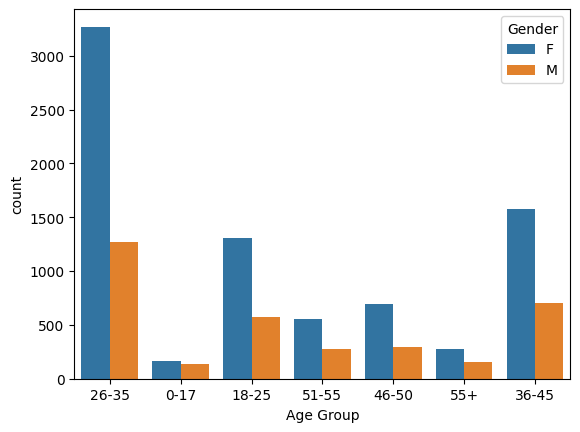

In [19]:
sns.countplot(data=df,x='Age Group',hue='Gender')

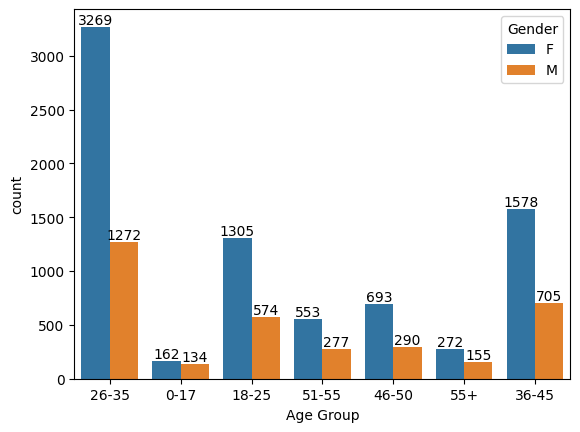

In [20]:
df3=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in df3.containers:
    df3.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

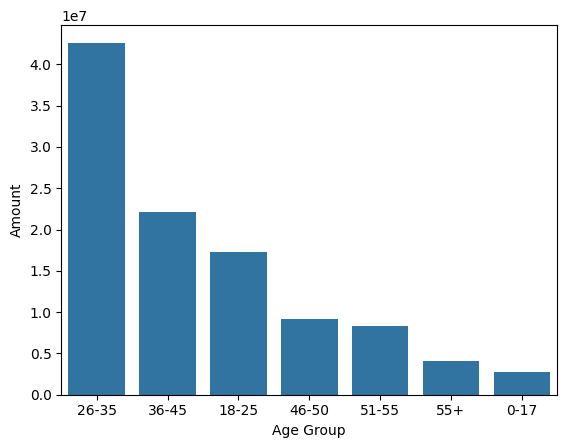

In [21]:
df4=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group', y='Amount', data=df4)

### State

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

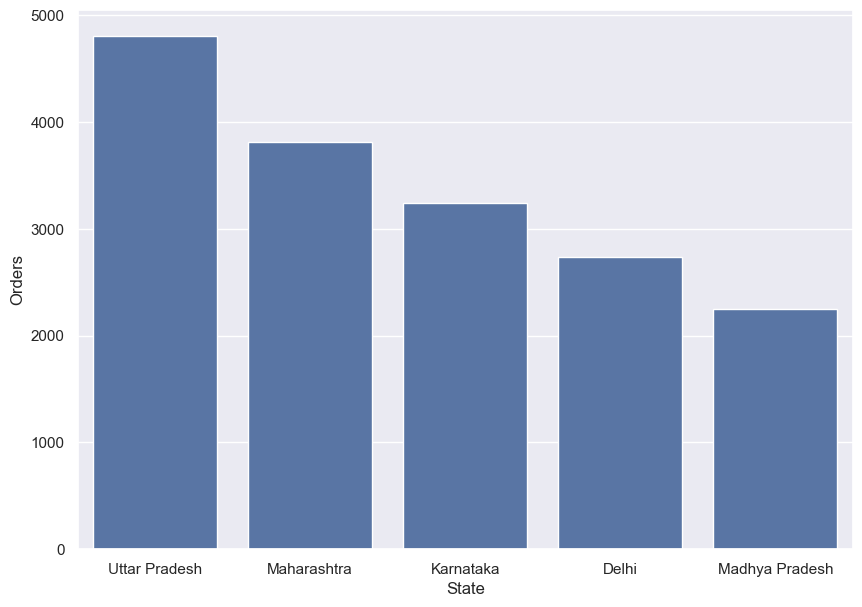

In [23]:
state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot( x='State',y='Orders',data=state)

<Axes: xlabel='State', ylabel='Amount'>

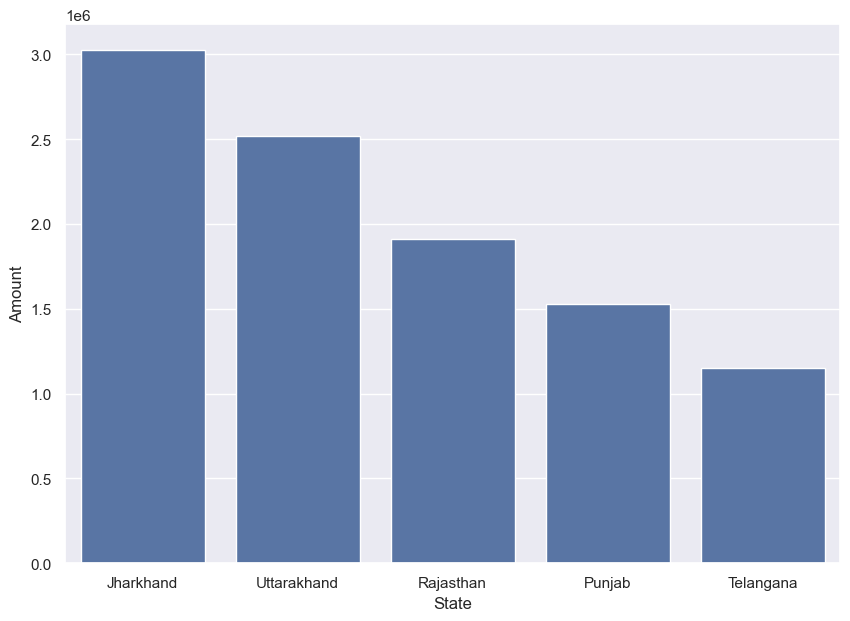

In [24]:
amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).tail(5)
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(data=amount, x='State',y='Amount')

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

### Shaadi

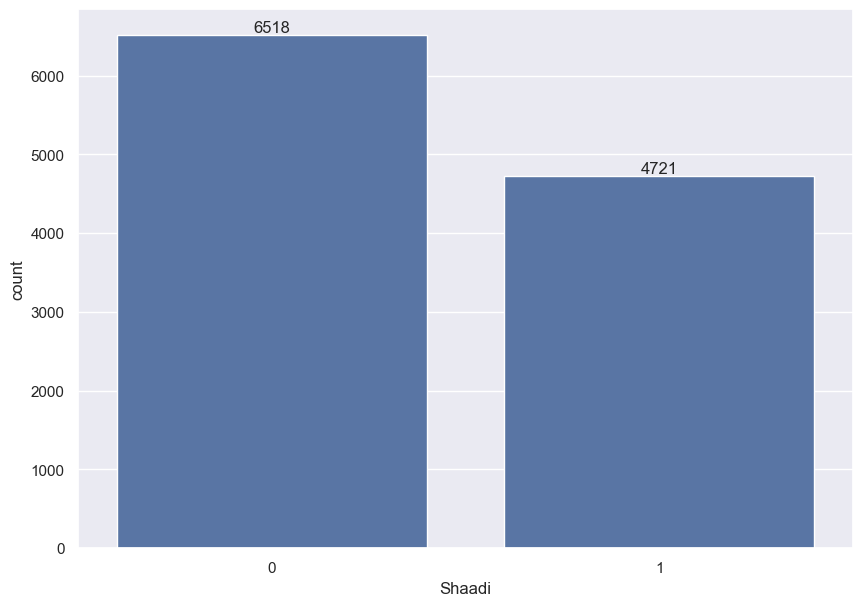

In [26]:
df3=sns.countplot(data=df,x='Shaadi')
sns.set(rc={'figure.figsize':(7,5)})
for bars in df3.containers:
    df3.bar_label(bars)

<Axes: xlabel='Shaadi', ylabel='Amount'>

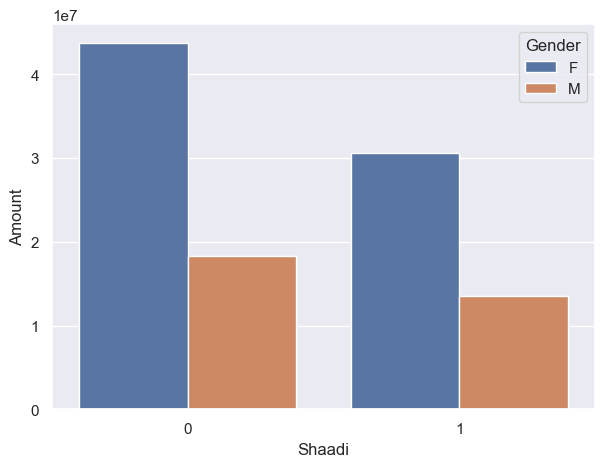

In [27]:
shadi=df.groupby(['Shaadi','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data=shadi, x='Shaadi',y='Amount',hue='Gender')

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

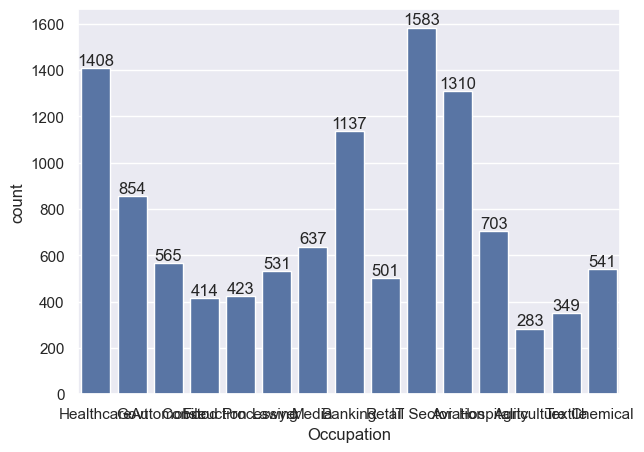

In [29]:
df3=sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(20,15)})
for bars in df3.containers:
    df3.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

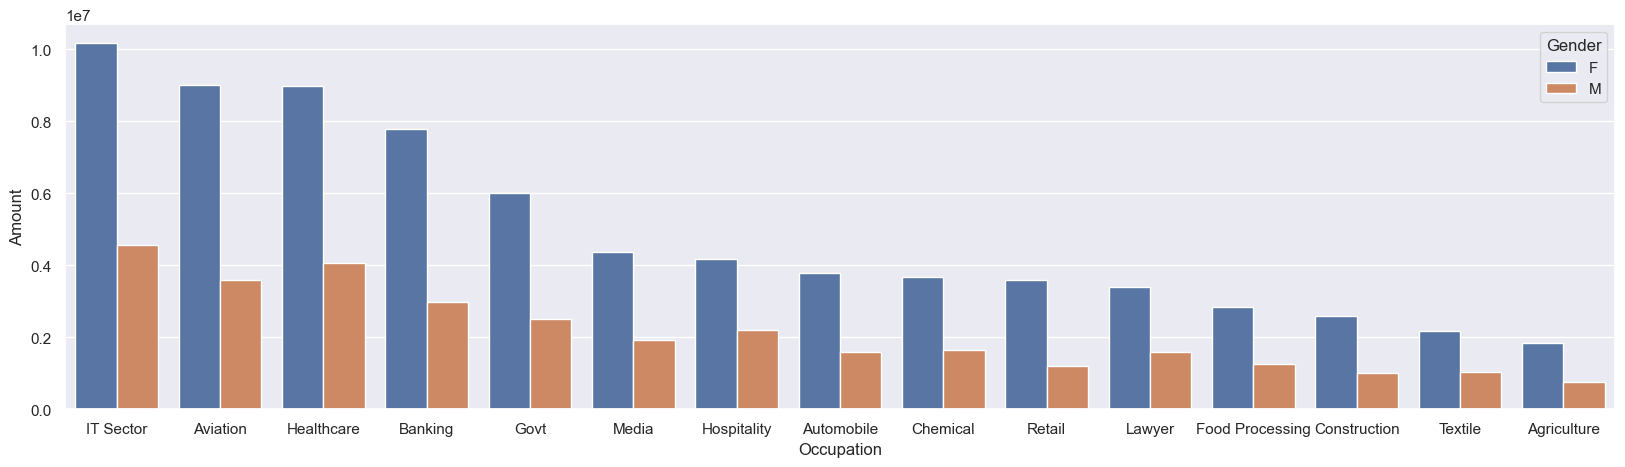

In [30]:
shadi=df.groupby(['Occupation','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=shadi, x='Occupation',y='Amount',hue='Gender')

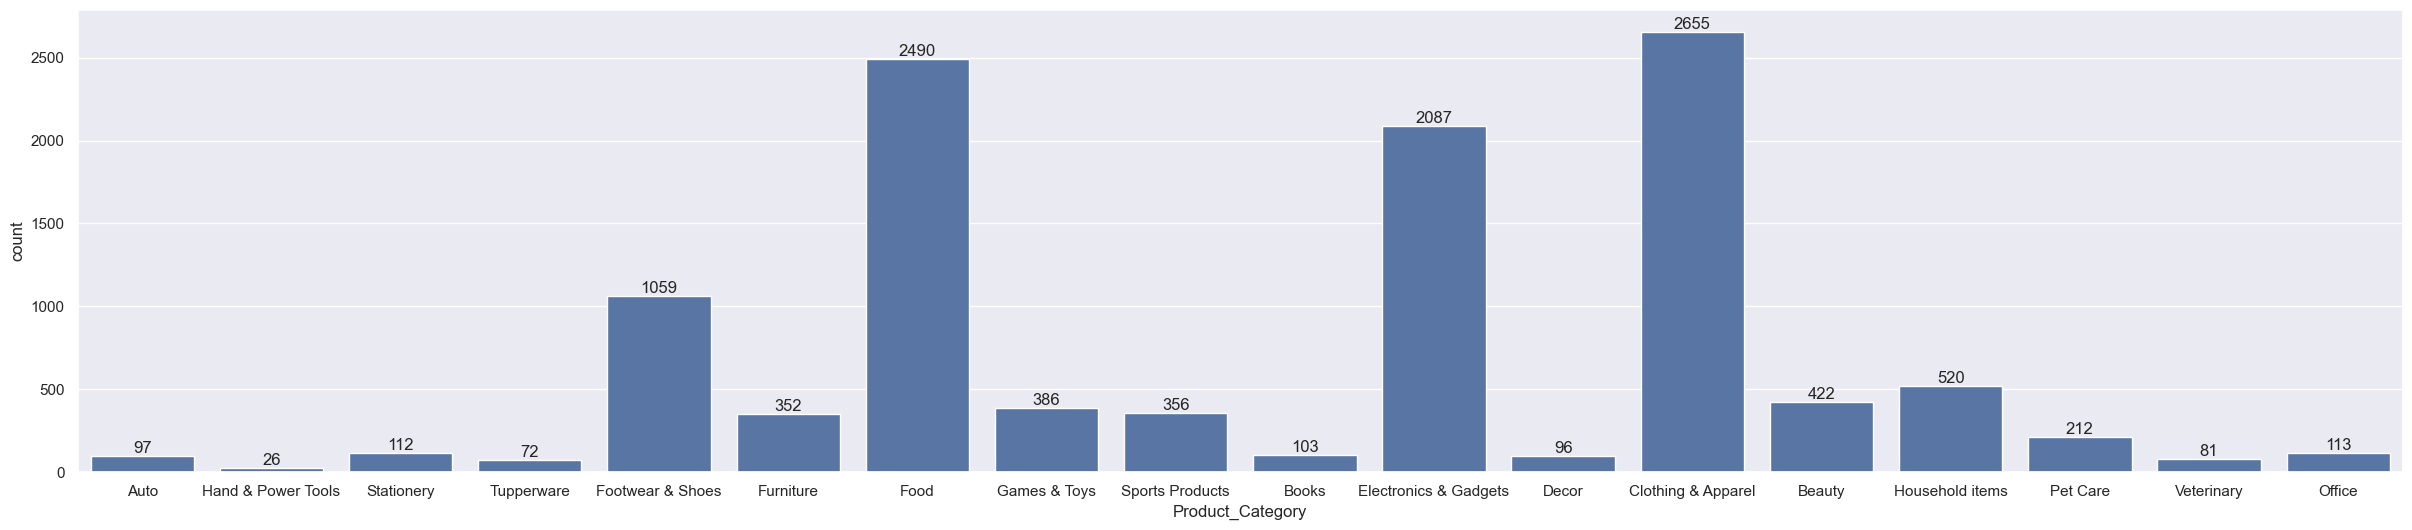

In [36]:
df3=sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize':(30,30)})
for bars in df3.containers:
    df3.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

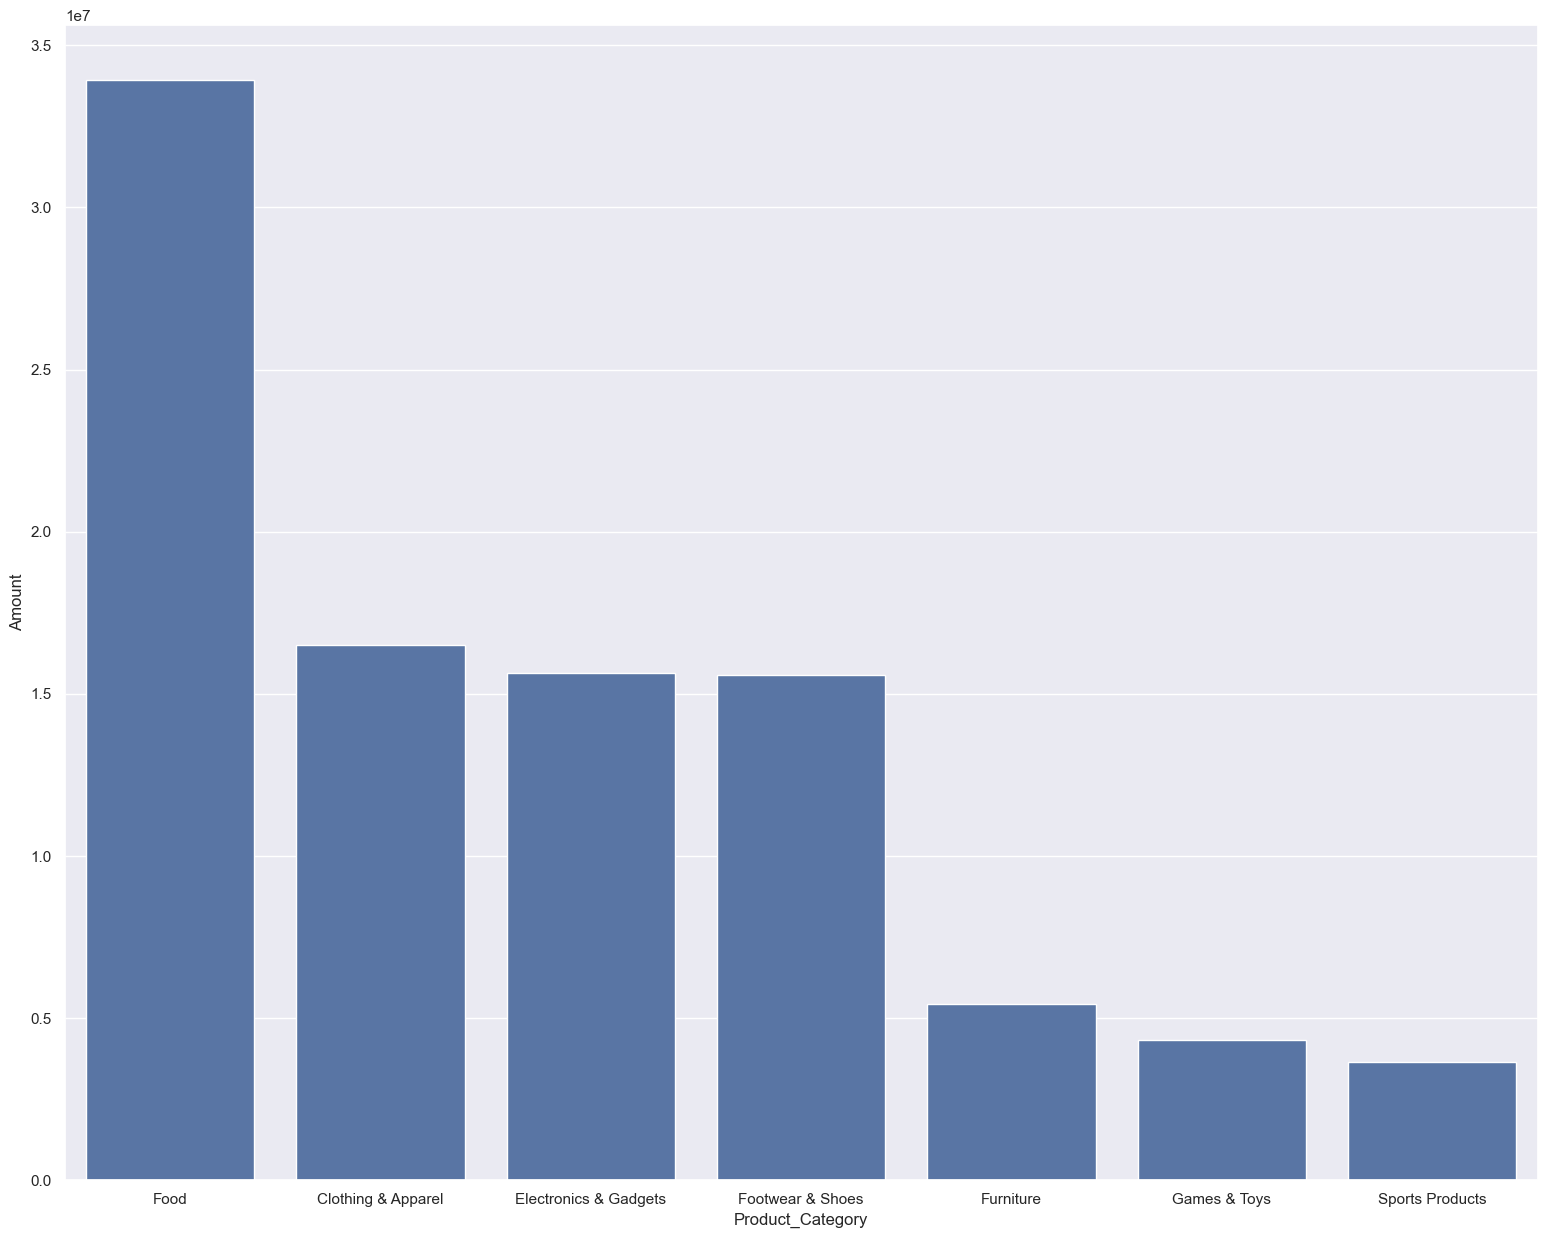

In [32]:
cate=df.groupby(['Product_Category',], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(7)
sns.set(rc={'figure.figsize':(19,15)})
sns.barplot(data=cate, x='Product_Category',y='Amount',)

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

<Axes: xlabel='Product_ID', ylabel='Orders'>

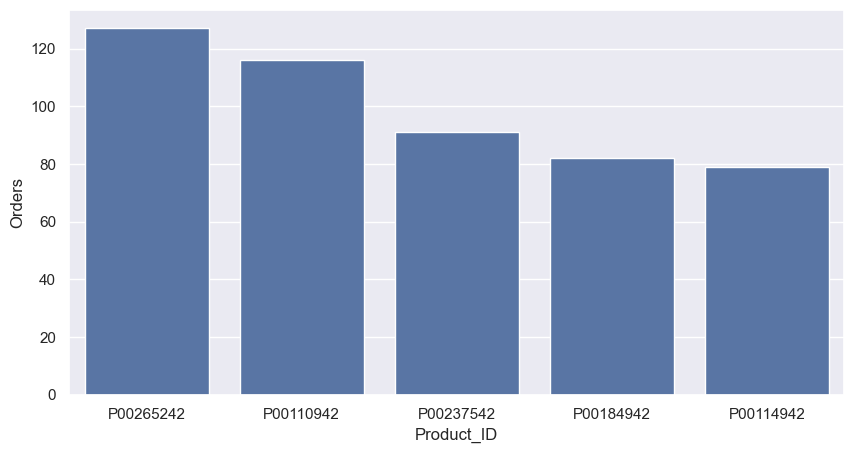

In [34]:
cate=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=cate, x='Product_ID',y='Orders')